In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('dynamic_asset_allocation_data.csv', parse_dates=['Date'])

                      Date      Asset_A      Asset_B      Asset_C      Asset_D
count                 2870  2870.000000  2870.000000  2870.000000  2870.000000
mean   2015-07-03 02:24:00   149.833110    99.419024   249.161458   199.950976
min    2010-01-01 00:00:00   100.013469    50.001163   200.024100   150.005283
25%    2012-10-02 06:00:00   124.264593    74.711082   224.344872   175.563494
50%    2015-07-02 12:00:00   150.269971    98.922047   248.558812   199.770306
75%    2018-04-02 18:00:00   175.212467   123.867888   274.012559   224.273052
max    2020-12-31 00:00:00   199.971767   149.955770   299.946068   249.967321
std                    NaN    29.165289    28.680484    28.747015    28.466454


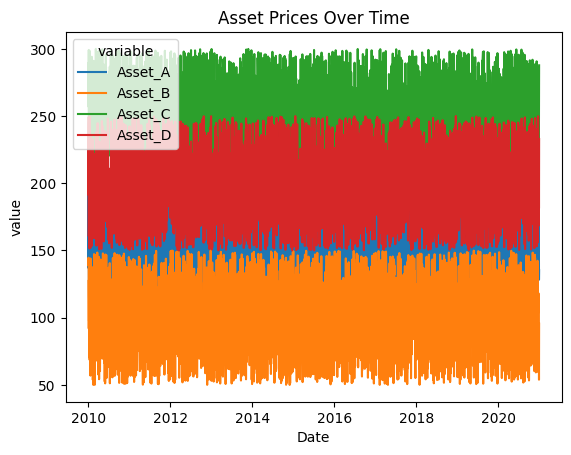

In [3]:
# EDA
print(data.describe())
sns.lineplot(x='Date', y='value', hue='variable',
             data=pd.melt(data, ['Date']))
plt.title('Asset Prices Over Time')
plt.show()

In [4]:
# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Date']))

# Prepare data for time series forecasting
X = []
y = []
time_steps = 30  # Number of time steps to look back

for i in range(time_steps, len(data_scaled)):
    X.append(data_scaled[i-time_steps:i])
    y.append(data_scaled[i])

X, y = np.array(X), np.array(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# LSTM
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    LSTM(50),
    Dense(y_train.shape[1])
])
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
57/57 [==============================] - 10s 48ms/step - loss: 0.1023 - mae: 0.2690 - val_loss: 0.0829 - val_mae: 0.2482
Epoch 2/50
57/57 [==============================] - 2s 30ms/step - loss: 0.0841 - mae: 0.2498 - val_loss: 0.0838 - val_mae: 0.2493
Epoch 3/50
57/57 [==============================] - 2s 30ms/step - loss: 0.0844 - mae: 0.2499 - val_loss: 0.0838 - val_mae: 0.2492
Epoch 4/50
57/57 [==============================] - 2s 31ms/step - loss: 0.0842 - mae: 0.2504 - val_loss: 0.0820 - val_mae: 0.2473
Epoch 5/50
57/57 [==============================] - 2s 35ms/step - loss: 0.0840 - mae: 0.2497 - val_loss: 0.0830 - val_mae: 0.2481
Epoch 6/50
57/57 [==============================] - 3s 49ms/step - loss: 0.0841 - mae: 0.2500 - val_loss: 0.0827 - val_mae: 0.2479
Epoch 7/50
57/57 [==============================] - 2s 32ms/step - loss: 0.0840 - mae: 0.2497 - val_loss: 0.0840 - val_mae: 0.2494
Epoch 8/50
57/57 [==============================] - 2s 30ms/step - loss: 0.0845 - 

In [6]:
# GRU
model_gru = Sequential([
    GRU(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    GRU(50),
    Dense(y_train.shape[1])
])
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
57/57 [==============================] - 7s 47ms/step - loss: 0.1045 - mae: 0.2700 - val_loss: 0.0829 - val_mae: 0.2477
Epoch 2/50
57/57 [==============================] - 2s 31ms/step - loss: 0.0853 - mae: 0.2516 - val_loss: 0.0824 - val_mae: 0.2475
Epoch 3/50
57/57 [==============================] - 2s 32ms/step - loss: 0.0845 - mae: 0.2502 - val_loss: 0.0846 - val_mae: 0.2497
Epoch 4/50
57/57 [==============================] - 2s 41ms/step - loss: 0.0843 - mae: 0.2500 - val_loss: 0.0851 - val_mae: 0.2503
Epoch 5/50
57/57 [==============================] - 3s 47ms/step - loss: 0.0844 - mae: 0.2502 - val_loss: 0.0826 - val_mae: 0.2476
Epoch 6/50
57/57 [==============================] - 2s 31ms/step - loss: 0.0847 - mae: 0.2505 - val_loss: 0.0864 - val_mae: 0.2520
Epoch 7/50
57/57 [==============================] - 2s 32ms/step - loss: 0.0843 - mae: 0.2506 - val_loss: 0.0831 - val_mae: 0.2482
Epoch 8/50
57/57 [==============================] - 2s 32ms/step - loss: 0.0839 - m

In [7]:
# Evaluate models
mse_lstm, mae_lstm = model_lstm.evaluate(X_test, y_test)
mse_gru, mae_gru = model_gru.evaluate(X_test, y_test)

print(f'LSTM - MSE: {mse_lstm}, MAE: {mae_lstm}')
print(f'GRU - MSE: {mse_gru}, MAE: {mae_gru}')

18/18 [==============================] - 0s 8ms/step - loss: 0.0835 - mae: 0.2491
LSTM - MSE: 0.08259034156799316, MAE: 0.24849636852741241
GRU - MSE: 0.08354336023330688, MAE: 0.24907426536083221
